In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.linalg import eigh
from sklearn import datasets
%config InlineBackend.figure_format = 'retina'
np.random.seed(21)
import os

###  Load the data set

And look at some of the images


In [3]:
data_files = os.listdir('data')

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data'

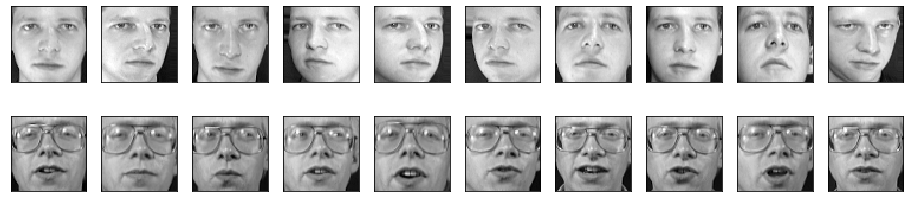

In [ ]:
# just using an example dataset from sklearn
data = datasets.fetch_olivetti_faces()
data = data.images.reshape(data.images.shape[0],data.images.shape[1]**2)
data = data.T

fig = plt.figure(figsize=(16,80))
for i in range(20):    
    ax = fig.add_subplot(40,10,i+1,xticks = [], yticks = [])
    image_i = data[:,i];
    ax.imshow(image_i.reshape(64,64), cmap=plt.cm.gray)

### Test and training data

To later evaluate the dimensionality reduction and test face recognition, we will split the data-set into a training and test set. We will only perform PCA on the training data


A look at the training set


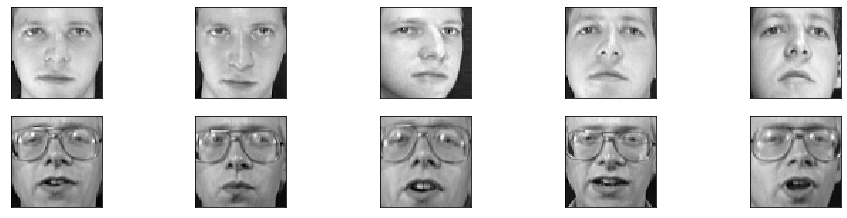

A look at the test set


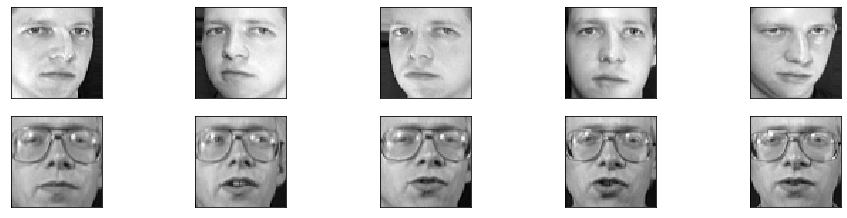

In [ ]:
Xdata = data[:,0::2] 

#plot training set
print('A look at the data set')
fig = plt.figure(figsize=(16,80))
for i in range(10):    
    ax = fig.add_subplot(40,5,i+1,xticks = [], yticks = [])
    image_i = Xdata[:,i];
    ax.imshow(image_i.reshape(64,64), cmap=plt.cm.gray)
plt.show()

###  Normalizing the data

Subtract the average image from all the images. Do not standardise (divide by the standard deviation).

Before applying PCA it is custom to normalize the data to avoid that the scales of single features dominate the first principle components.

For face images, normalization is performed by computing the average training image $\widehat{\mathbf{x}}$ and subtracting it from each of the training images, $\mathbf{x}_i - \widehat{\mathbf{x}}$. 


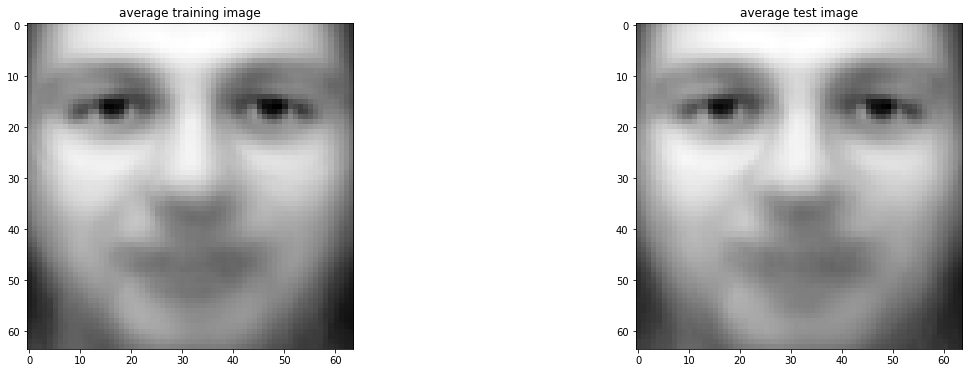

In [ ]:
X_mean = np.mean(Xdata,axis=1)
X = Xdata - X_mean[:, None]

plt.figure(figsize=(20, 6))
plt.imshow(X_mean.reshape(64,64),cmap = plt.cm.gray)
plt.title('average training image')

###  Principal component analysis and eigenfaces

Run PCA on the images (with the average image subtracted). The scores (i.e., the representation of the images in PCA space) will be the predictors in the linear encoding model.

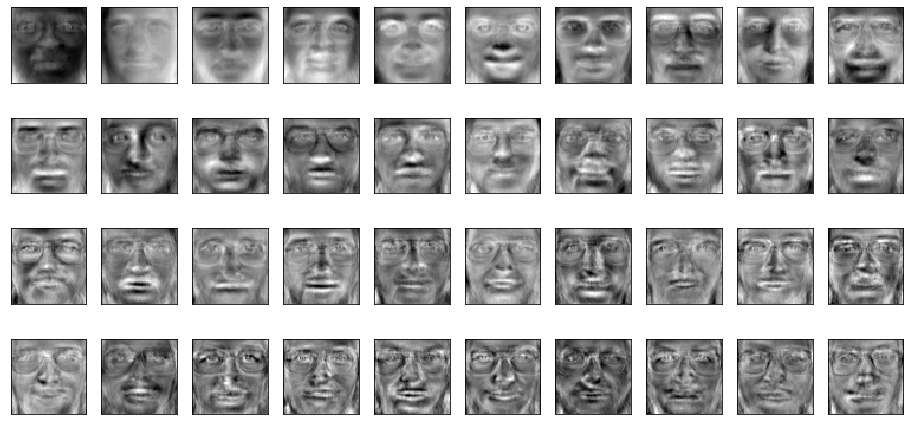

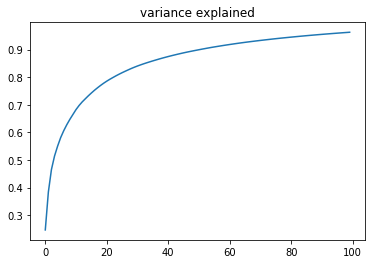

In [ ]:
# compute covariance matrix
S = np.cov(X)

# obtain eigenvalues and eigenvectors
# scores is the eigenVectors
eigenValues, eigenVectors = eigh(S)

# sort eigenvectors according to eigenvalues
sort_idx = np.argsort(eigenValues)[::-1]
eigenValues = eigenValues[sort_idx]
eigenVectors = eigenVectors[:, sort_idx]



Visually present the first few PCA components as images. Visualise a component by reconstructing the images that has the max/min score for that component. Compare these to the mean image. You can also create synthetic image using scores that lie somewhere between the max/min score. In this way you can visualise the effect that one principal component has on the images. Show figures of your visualisation. What image features do the
PCs represent?

In [ ]:
# plot eigenfaces
fig = plt.figure(figsize=(16,20))
for i in range(10):    
    ax = fig.add_subplot(2, 5,i+1,xticks = [], yticks = [])    
    im = eigenVectors[:,i]
    ax.imshow(im.reshape(64,64),cmap = plt.cm.gray)
plt.grid()
plt.show();
    
#plot cummulative variance explained    
summ = eigenValues.sum()
cumsum = 0
total_var_explained = np.zeros(100)
for i in range(100):    
    cumsum += eigenValues[i]
    total_var_explained[i]=(cumsum/summ)
plt.plot(total_var_explained)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('variance explained');

### Decomposing faces using eigenfaces

We will take a look at eigenfaces constructed using $M$ eigenfaces (principal components).
It is noteworthy that the different faces require a different amount of principal components. Those most similar to the mean image require the lowest amount of principal components.

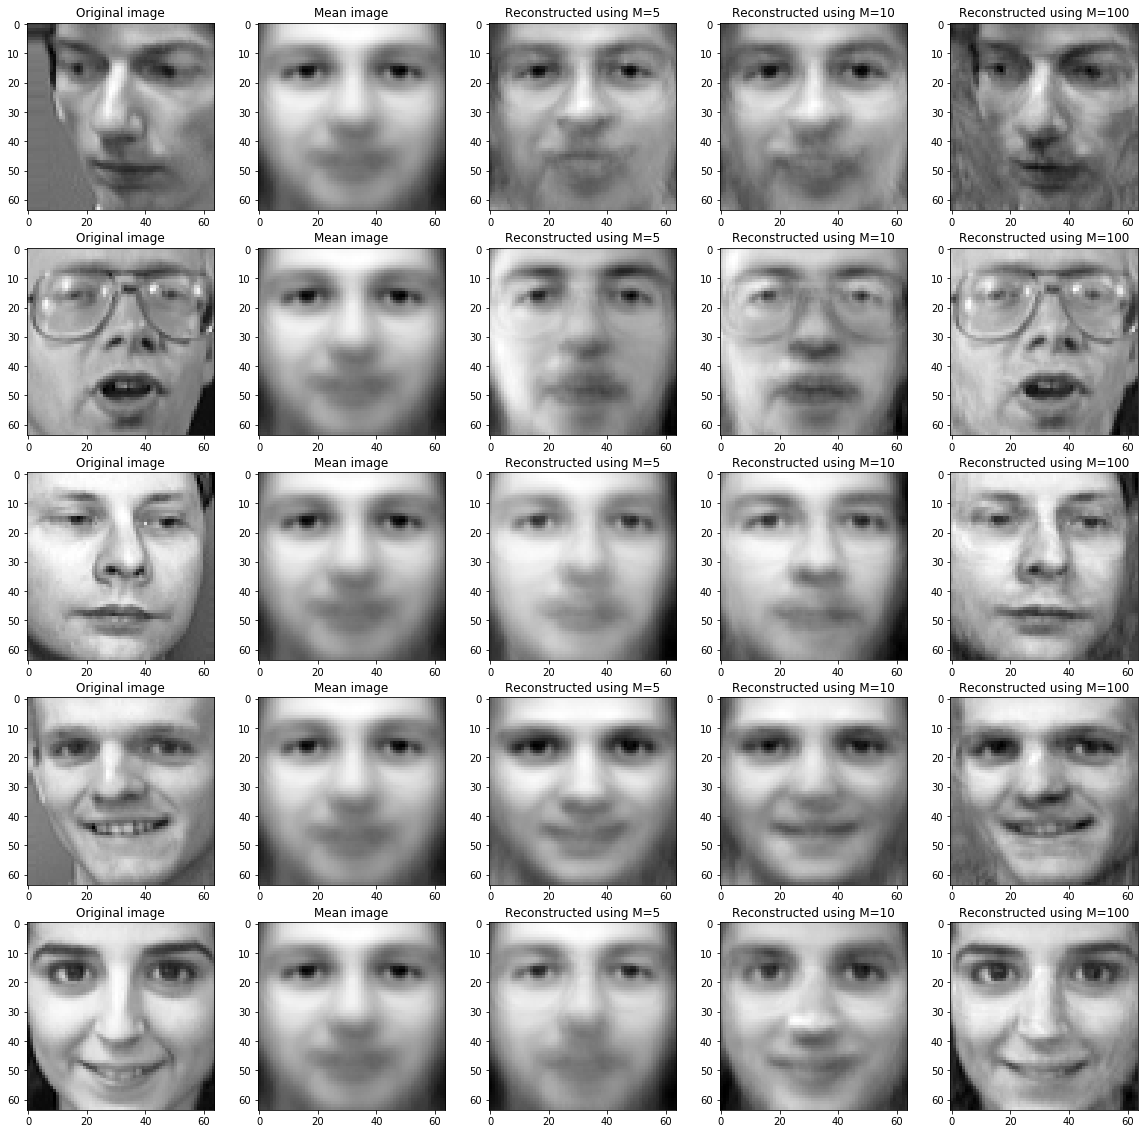

In [ ]:
randperm = np.random.permutation(Xdata.shape[1])

plt.figure(figsize=(20, 20))
for i in range(3):
    
    j = randperm[i]
    # show image
    ax = plt.subplot2grid((5, 5), (i, 0))
    
    ax.imshow(Xdata[:, j].reshape(64,64),cmap = plt.cm.gray)
    plt.title('Original image')
    
    # show mean value
    ax = plt.subplot2grid((5, 5), (i, 1))
    ax.imshow(X_mean.reshape(64,64),cmap = plt.cm.gray)
    plt.title('Mean image')
        
    for idx_m, m in enumerate([5, 10, 100]):
    
        z = eigenVectors.T@X[:, j]
        x_reconstruction = X_mean + eigenVectors[:, :m]@z[:m]
    
        ax = plt.subplot2grid((5, 5), (i, 2 + idx_m))
        ax.imshow(x_reconstruction.reshape(64,64),cmap = plt.cm.gray)
        
        plt.title('Reconstructed using M=%d' % m)
    

# Bar plot
Show a bar plot of the variance explained for all the PCs. Use it to select which PCs you want to include in your model. You should reduce the dimensionality
significantly. How did you decide?